[View in Colaboratory](https://colab.research.google.com/github/Huzaifakamran/Deep_Learning_With_Keras/blob/master/NewsWires_by_Reuters_dataset.ipynb)

In [2]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])




557056/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[0]

3

In [0]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
  

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [13]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val)
                  )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 164us/step - loss: 2.5219 - acc: 0.4957 - val_loss: 1.7203 - val_acc: 0.6140
Epoch 2/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.4471 - acc: 0.6887 - val_loss: 1.3506 - val_acc: 0.7040
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0979 - acc: 0.7642 - val_loss: 1.1725 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.8704 - acc: 0.8166 - val_loss: 1.0786 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.7036 - acc: 0.8484 - val_loss: 0.9839 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.5667 - acc: 0.8800 - val_loss: 0.9387 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.4604 - acc: 0.9044 - val_loss: 0.9091 - val_acc: 0.8030


7982/7982 [==============================] - 1s 146us/step - loss: 0.3039 - acc: 0.9317 - val_loss: 0.8912 - val_acc: 0.8070
Epoch 10/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.2546 - acc: 0.9411 - val_loss: 0.9072 - val_acc: 0.8130
Epoch 11/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.2192 - acc: 0.9470 - val_loss: 0.9157 - val_acc: 0.8080
Epoch 12/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.1886 - acc: 0.9506 - val_loss: 0.9094 - val_acc: 0.8150
Epoch 13/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1710 - acc: 0.9529 - val_loss: 0.9341 - val_acc: 0.8090
Epoch 14/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.1546 - acc: 0.9555 - val_loss: 0.9633 - val_acc: 0.8050
Epoch 15/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.1397 - acc: 0.9560 - val_loss: 0.9688 - val_acc: 0.8140
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 144us/step - loss: 0.1204 - acc: 0.9573 - val_loss: 1.0430 - val_acc: 0.8020
Epoch 19/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.1147 - acc: 0.9594 - val_loss: 1.1003 - val_acc: 0.7950
Epoch 20/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.1124 - acc: 0.9599 - val_loss: 1.0698 - val_acc: 0.8000


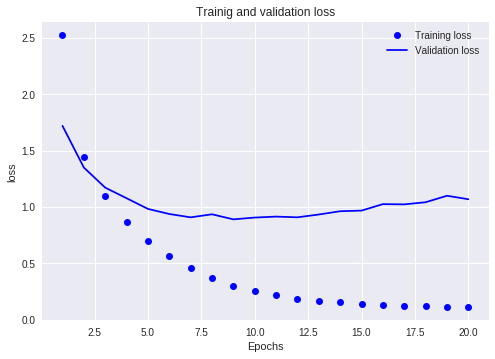

In [14]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

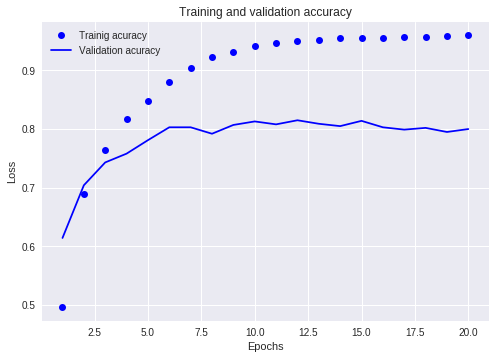

In [16]:
plt.clf()
acc=history.history['acc']
val_acc=history.history['val_acc']
plt.plot(epochs,acc,'bo',label='Trainig acuracy')
plt.plot(epochs,val_acc,'b',label='Validation acuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.8016 - acc: 0.5040 - val_loss: 1.8397 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 138us/step - loss: 1.5295 - acc: 0.6946 - val_loss: 1.3415 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 1s 141us/step - loss: 1.1193 - acc: 0.7684 - val_loss: 1.1444 - val_acc: 0.7440
Epoch 4/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.8776 - acc: 0.8143 - val_loss: 1.0335 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 145us/step - loss: 0.7077 - acc: 0.8463 - val_loss: 0.9715 - val_acc: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 143us/step - loss: 0.5697 - acc: 0.8748 - val_loss: 0.9438 - val_acc: 0.7970
Epoch 7/9
7982/7982 [==============================] - 1s 143us/step - loss: 0.4598 - acc: 0.9054 - val_loss: 0.9258 - val_acc: 0.7950
Epoch 8

2246/2246 [==============================] - 0s 108us/step


In [21]:
predictions=model.predict(x_test)
predictions[0].shape

(46,)